<a href="https://colab.research.google.com/github/Ciiku-Kihara/PCA-ANOMALY-DETECTION-AND-ASSOCIATION-ANALYSIS-WITH-R/blob/main/Anomaly_Detection_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anomaly Detection with R




## a) Defining the analysis question

You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).

I am expected to detect any anomalies in sales

## b) Defining the metric for success

Be able to effectively identify anomalies in sales in the data provided

## c) Understanding the context

Carrefour was launched in the region in 1995 by UAE-based Majid Al Futtaim, which is the exclusive franchisee to operate Carrefour in over 30 countries across the Middle East, Africa, and Asia, and fully owns the operations in the region. Today, Majid Al Futtaim operates over 320 Carrefour stores in 16 countries, serving more than 750,000 customers daily and employing over 37,000 colleagues.

Carrefour operates different store formats, as well as multiple online offerings to meet the growing needs of its diversified customer base. In line with the brand’s commitment to provide the widest range of quality products and value for money, Carrefour offers an unrivalled choice of more than 500,000 food and non-food products, and a locally inspired exemplary customer experience to create great moments for everyone every day.

## d) Recording the experimental design

- Problem Definition
- Anomaly Detection
- Provide insights based on my analysis
- Provide recommendations


## e) Data Relevance

The dataset adequate to apply anomaly detection techniques

# 2. Installing and importing relevant libraries

In [ ]:
# Installing the necessary packages

install.packages(c("anomalize", "tidyverse", "tibbletime", "timetk"))


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘listenv’, ‘parallelly’, ‘TTR’, ‘prodlim’, ‘future’, ‘globals’, ‘later’, ‘quadprog’, ‘quantmod’, ‘gower’, ‘ipred’, ‘furrr’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’, ‘warp’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘sweep’, ‘zoo’, ‘recipes’, ‘rsample’, ‘plotly’, ‘padr’, ‘xts’, ‘slider’, ‘anytime’, ‘timeDate’, ‘forecast’




In [ ]:
# Loading the libraries

library(anomalize)
library(tidyverse)
library(tibbletime)
library(timetk)

══ Use anomalize to improve your Forecasts by 50%! ═════════════════════════════
Business Science offers a 1-hour course - Lab #18: Time Series Anomaly Detection!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘tibbletime’


The following object is masked from ‘package:stats’:

    filter




# 3. Loading and checking the data

In [ ]:
# Reading the dataset

ano = read.csv("Anomaly.csv")

In [ ]:
# Loading the first 6 rows of the dataset

head(ano)

,Date,Sales
,<chr>,<dbl>
1,1/5/2019,548.9715
2,3/8/2019,80.2200
3,3/3/2019,340.5255
4,1/27/2019,489.0480
5,2/8/2019,634.3785
6,3/25/2019,627.6165


In [ ]:
# Obtaining the dimensions of the dataset

dim(ano)

# The dataset has 1000 rows and 2 columns

[1] 1000    2

In [ ]:
# Getting a glimpse of the structure of the dataset

str(ano)

# Of the 2 columns, 1 is an integer and the other is type character

'data.frame':	1000 obs. of  2 variables:
 $ Date : chr  "1/5/2019" "3/8/2019" "3/3/2019" "1/27/2019" ...
 $ Sales: num  549 80.2 340.5 489 634.4 ...


In [ ]:
# Checking for duplicates

sum(duplicated(ano))

# There are no duplicated records in the dataset

[1] 0

In [ ]:
# Checking for null values

colSums(is.na(ano))

# There are no null values in the dataset

Date Sales 
    0     0

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



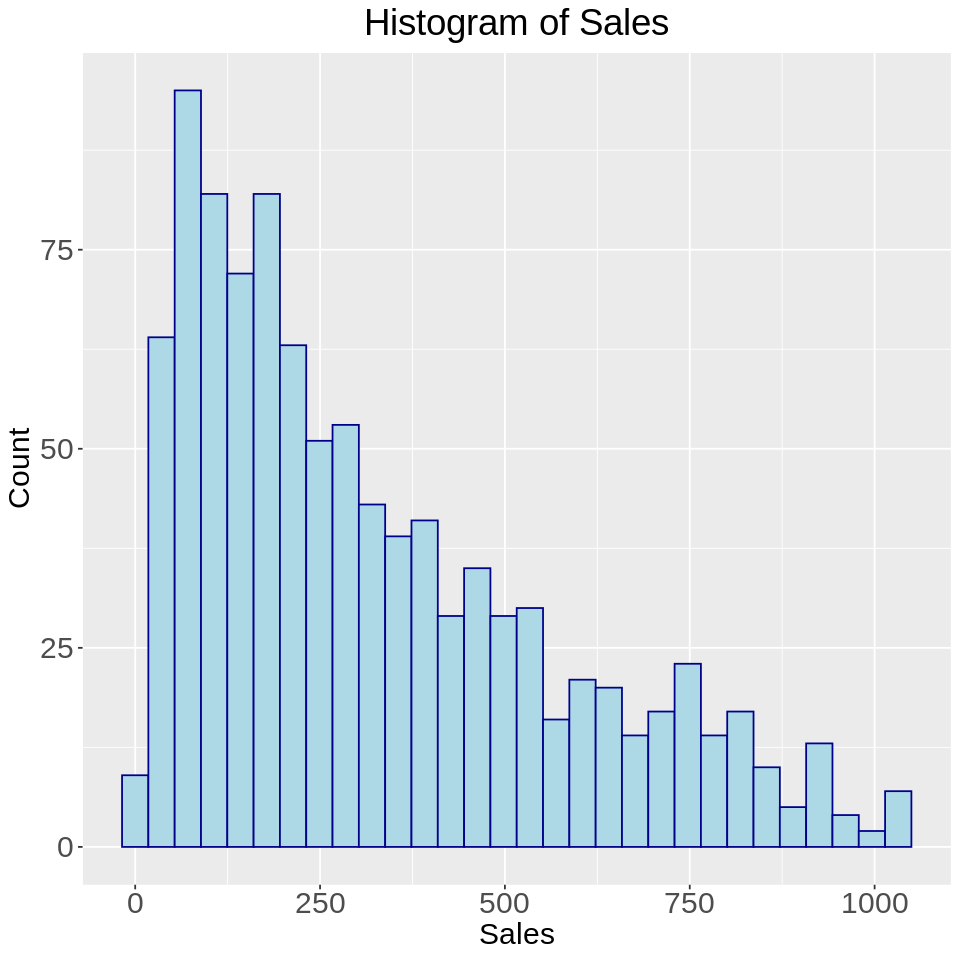

In [ ]:
# Analysis of the sales column

options(repr.plot.width = 8, repr.plot.height = 8)
p = ano %>% ggplot(aes(x = Sales))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Sales", x = "Sales", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

# 4. Implement the solution

In [ ]:
# Changing the date to date column'

ano$Date <- as.Date(ano$Date,format = "%m/%d/%y")

In [ ]:
head(ano)

,Date,Sales
,<date>,<dbl>
1,2020-01-05,548.9715
2,2020-03-08,80.2200
3,2020-03-03,340.5255
4,2020-01-27,489.0480
5,2020-02-08,634.3785
6,2020-03-25,627.6165


In [ ]:
# Ordering the date column

ano1  = ano[order(ano$Date), ]     
head(ano1) 

,Date,Sales
,<date>,<dbl>
18,2020-01-01,457.443
246,2020-01-01,399.756
451,2020-01-01,470.673
485,2020-01-01,388.290
497,2020-01-01,132.762
524,2020-01-01,132.027


In [ ]:
# Aggreagate the Sales by date

ano2 = aggregate(ano1["Sales"], by=list(ano1$Date), sum)
head(ano2)

,Group.1,Sales
,<date>,<dbl>
1,2020-01-01,4745.181
2,2020-01-02,1945.503
3,2020-01-03,2078.128
4,2020-01-04,1623.688
5,2020-01-05,3536.684
6,2020-01-06,3614.205


In [ ]:
# Converting the aggregated product into a tibble

df <- as_tibble(ano2)
head(df)

Group.1,Sales
<date>,<dbl>
2020-01-01,4745.181
2020-01-02,1945.503
2020-01-03,2078.128
2020-01-04,1623.688
2020-01-05,3536.684
2020-01-06,3614.205


In [ ]:
# Building the model using anomalize and increasing alpa to 0.25

df_anomalized <- df %>%
    time_decompose(Sales, merge = TRUE) %>%
    anomalize(remainder, alpha = 0.25) %>%
    time_recompose()
    

Converting from tbl_df to tbl_time.
Auto-index message: index = Group.1

frequency = 7 days

trend = 30 days



In [ ]:
# Looking at the structure of the new dataset

str(df_anomalized)

tbl_time [89 × 11] (S3: tbl_time/tbl_df/tbl/data.frame)
 $ Group.1      : Date[1:89], format: "2020-01-01" "2020-01-02" ...
 $ Sales        : num [1:89] 4745 1946 2078 1624 3537 ...
 $ observed     : num [1:89] 4745 1946 2078 1624 3537 ...
 $ season       : num [1:89] 596 -216 -610 -351 696 ...
 $ trend        : num [1:89] 2886 2952 3018 3084 3147 ...
 $ remainder    : num [1:89] 1264 -791 -330 -1109 -307 ...
 $ remainder_l1 : num [1:89] -1925 -1925 -1925 -1925 -1925 ...
 $ remainder_l2 : num [1:89] 2234 2234 2234 2234 2234 ...
 $ anomaly      : Named chr [1:89] "No" "No" "No" "No" ...
  ..- attr(*, "names")= chr [1:89] "25%" "25%" "25%" "25%" ...
 $ recomposed_l1: num [1:89] 1556 811 483 808 1919 ...
 $ recomposed_l2: num [1:89] 5715 4970 4642 4967 6078 ...
 - attr(*, "index_quo")= language ~Group.1
  ..- attr(*, ".Environment")=<environment: 0x562215a725f0> 
 - attr(*, "index_time_zone")= chr "UTC"


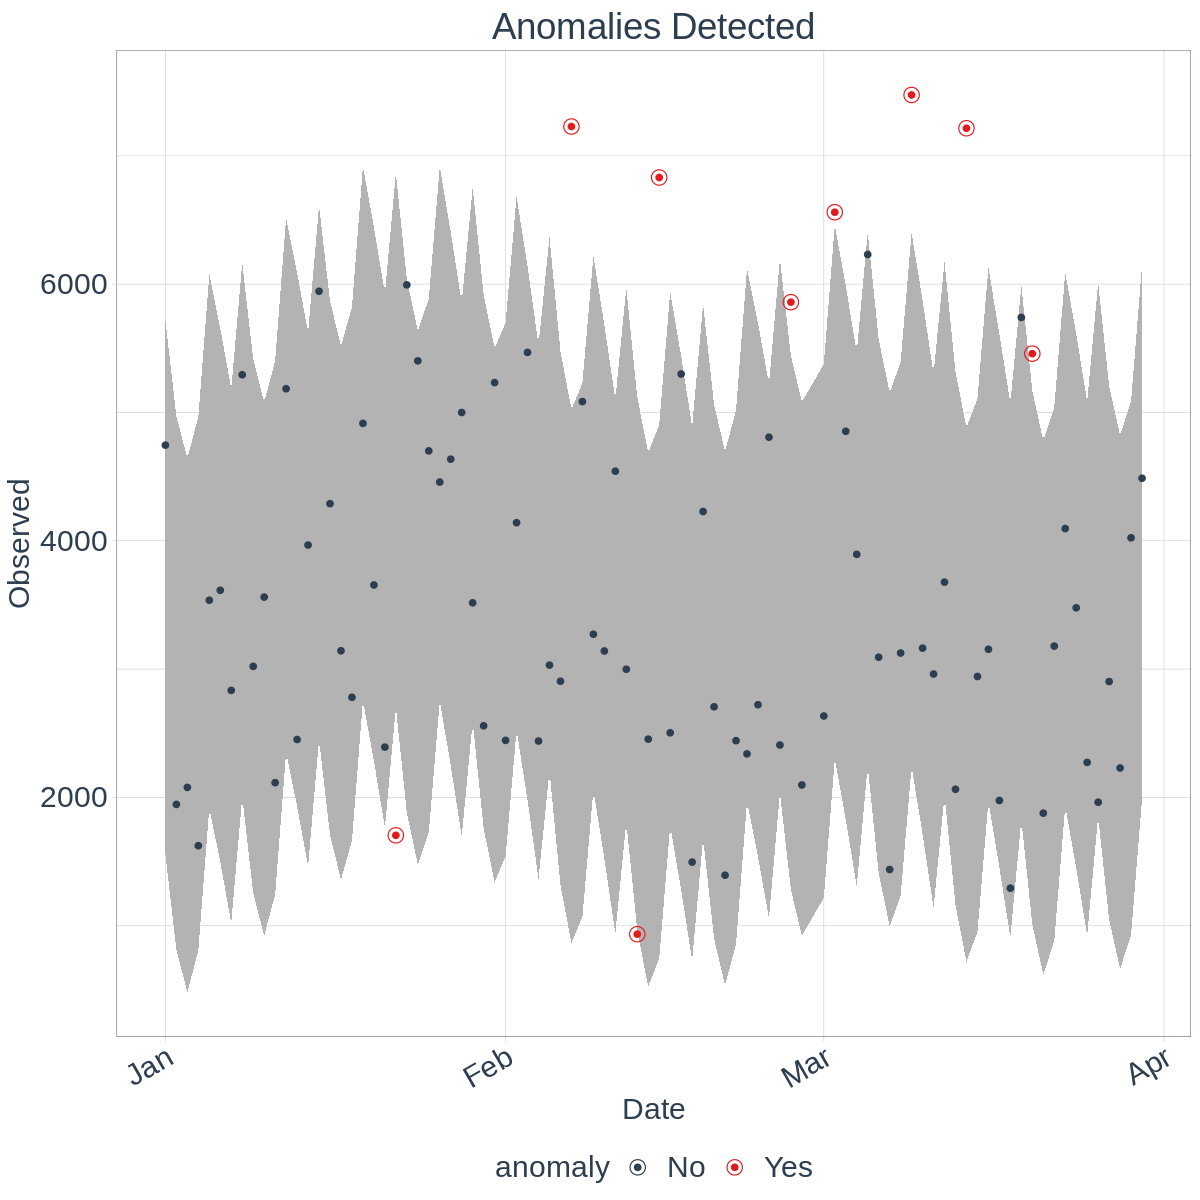

In [ ]:
# Plotting the amomalies

options(repr.plot.width = 10, repr.plot.height = 10)
df_anomalized %>% plot_anomalies(time_recomposed = TRUE) +
    labs(title = "Anomalies Detected", x = "Date", y = "Observed") + theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

In [ ]:
# Extracting the anomalous data point

df %>%
    time_decompose(Sales, merge = TRUE) %>%
    anomalize(remainder, alpha = 0.25) %>%
    time_recompose() %>%
    filter(anomaly == 'Yes')

Converting from tbl_df to tbl_time.
Auto-index message: index = Group.1

frequency = 7 days

trend = 30 days



Group.1,Sales,observed,season,trend,remainder,remainder_l1,remainder_l2,anomaly,recomposed_l1,recomposed_l2
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2020-01-22,1704.7695,1704.7695,595.6079,4032.228,-2923.066,-1925.024,2233.955,Yes,2702.8124,6861.791
2020-02-07,7228.2105,7228.2105,-610.3359,3401.507,4437.040,-1925.024,2233.955,Yes,866.1471,5025.125
2020-02-13,934.2375,934.2375,-215.6459,3101.352,-1951.469,-1925.024,2233.955,Yes,960.6827,5119.661
2020-02-15,6830.7855,6830.7855,-351.4537,3021.627,4160.612,-1925.024,2233.955,Yes,745.1501,4904.128
2020-02-27,5859.4515,5859.4515,-215.6459,3422.860,2652.237,-1925.024,2233.955,Yes,1282.1911,5441.169
2020-03-02,6560.3055,6560.3055,696.4782,3528.571,2335.256,-1925.024,2233.955,Yes,2300.0258,6459.004
2020-03-09,7474.0470,7474.0470,696.4782,3469.702,3307.867,-1925.024,2233.955,Yes,2241.1567,6400.135
2020-03-14,7214.6340,7214.6340,-610.3359,3255.843,4569.127,-1925.024,2233.955,Yes,720.4836,4879.462
2020-03-20,5458.2045,5458.2045,-215.6459,3151.972,2521.878,-1925.024,2233.955,Yes,1011.3027,5170.281


# 5. Insights

The insights that can be made from the analysis are as follows:

- Very low sales were made on the 13th of February and 22nd of January that year
- Really high sales were made on 9th March, 7th February and 14th of March.


# 6. Recommendations

In light of the above insights, the following recommendations can be made:

- The company should look into finding out why the sales were so high in the days mentioned. For example, high sales on the 7th of February would be because of early Valentine's shopping. 

- Also given that its the year that COVID hit the globe, high sales on those days may have caused by a mass rush to stock up on supplies as people anticipate a lockdown

- Given that the 13th of February is just before Valentine's day, the company can introduce special offers to increase sales on that day. The company should also look into why there were low sales on the 22nd of January as  well.